# **BUBBLE PLOT**

#### IMPORT REQUIRED LIBRARIES

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#### CONNECT TO DATABASE

In [62]:
# Connect to Database
conn = sqlite3.connect("my_analysis.db")

# Check
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

print(df.shape)
df.head()

(65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### EXPLORING DATA DISTRIBUTIONS USING BUBBLE PLOTS

Bubble Plot for Age vs. Frequency of Participation

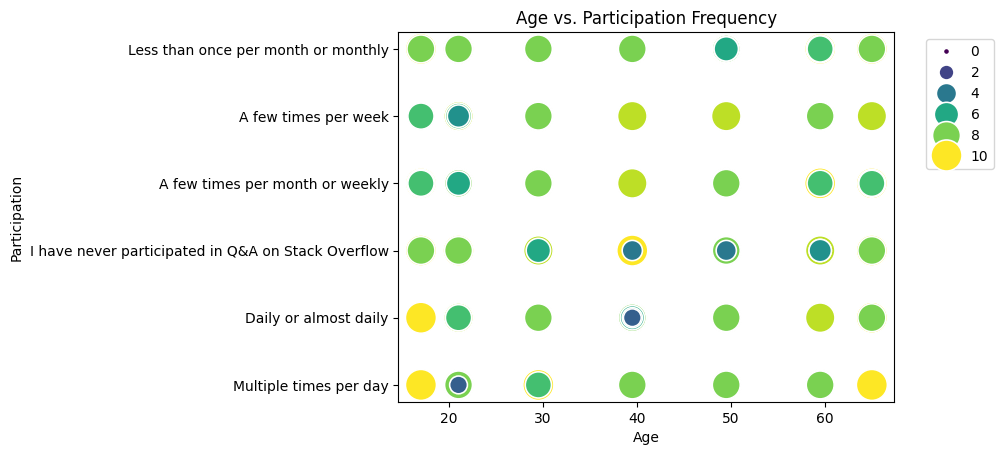

In [63]:
# Make a numeric column for Age
age_map = {'Under 18 years old': 17,
           '18-24 years old': 21, 
           '25-34 years old': 29.5, 
           '35-44 years old': 39.5, 
           '45-54 years old': 49.5,
           '55-64 years old': 59.5, 
           '65 years or older': 65}
# Apply map
df['Num_Age'] = df['Age'].map(age_map)

# Create a seperate dataframe
plot1_df = df[['Num_Age', 'Age', 'SOPartFreq', 'JobSat']].dropna().copy()

# Bubble Plot
sns.scatterplot(plot1_df, x='Num_Age', y='SOPartFreq', size='JobSat', sizes=(20,500), palette='viridis', hue='JobSat')

plt.title('Age vs. Participation Frequency')
plt.xlabel('Age')
plt.ylabel('Participation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Bubble Plot for Compensation vs. Job Satisfaction

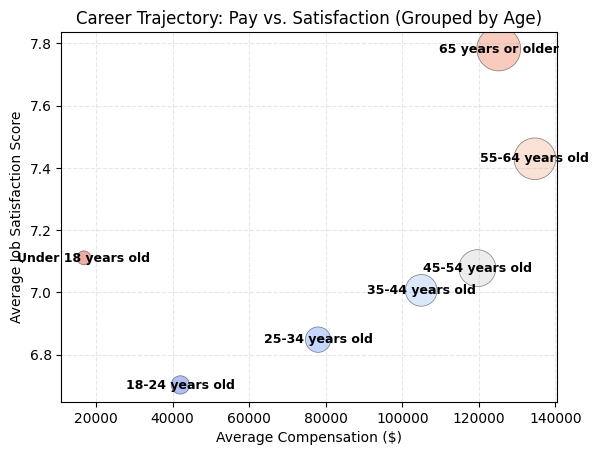

In [64]:
# Create seperate DataFrame
plot2_df = df[['ConvertedCompYearly', 'JobSat', 'Num_Age', 'Age']].dropna().copy()
group_plot2 = plot2_df.groupby(['Age'], as_index=False).agg(
    avg_pay = ('ConvertedCompYearly', 'mean'),
    avg_sat = ('JobSat', 'mean'),
    avg_age = ('Num_Age', 'mean')
)

# Bubble Plot
sns.scatterplot(group_plot2, x='avg_pay', y='avg_sat', 
                size='avg_age', sizes=(100, 1000), palette='coolwarm', 
                hue='Age', alpha=0.5, edgecolor='black', linewidth=0.5, legend=False)

# Add labels direcly to bubbles
for i in range(group_plot2.shape[0]):
    plt.text(
        group_plot2.avg_pay.iloc[i],
        group_plot2.avg_sat.iloc[i],
        group_plot2.Age.iloc[i],
        fontsize=9,
        ha='center', va='center', weight='bold' # Center text inside bubble
    )

plt.title('Career Trajectory: Pay vs. Satisfaction (Grouped by Age)')
plt.xlabel('Average Compensation ($)')
plt.ylabel('Average Job Satisfaction Score')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.show()

---

#### ANALYZING RELATIONSHIP USING BUBBLE PLOTS

Bubble Plot of Technology Preferences by Age

In [65]:
# Fix Age category order
age_order = ['Under 18 years old','18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older', 'Prefer not to say']


df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

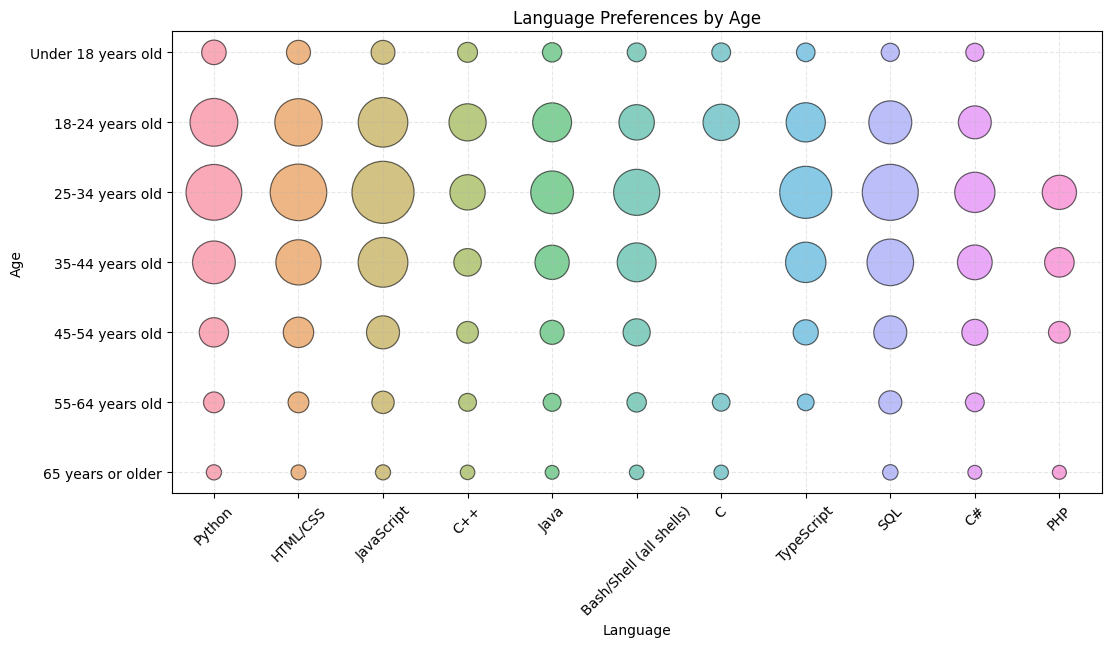

In [105]:
# Filter the data
lang_age = df[df['Age'] != 'Prefer not to say'][['Age', 'LanguageHaveWorkedWith', 'Num_Age']].dropna().copy()

# Fix language values
lang_age['Language'] = lang_age['LanguageHaveWorkedWith'].str.split(';')
clean_lang = lang_age.explode('Language')

# Aggeragate
grouped = clean_lang.groupby(['Age', 'Num_Age', 'Language'], observed=True).size().reset_index(name='count')

grouped = grouped.sort_values(['Age', 'count'], ascending=[True, False])

top_lang = grouped.groupby('Age', observed=True).head(10)

# Bubble plot
plt.figure(figsize=(12,6))
sns.scatterplot(top_lang, x='Language', y='Age', size='count', 
                hue='Language', sizes=(100, 2000), alpha=0.6,
                edgecolor='black', legend=False)

plt.title('Language Preferences by Age')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()